In [31]:
#import libraries for machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
%matplotlib inline


#read in the csv file of the cleaned data
df = pd.read_csv('data/yahoo_stock.csv')

#check the head of the data
df.head()

#check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


<AxesSubplot:xlabel='Date'>

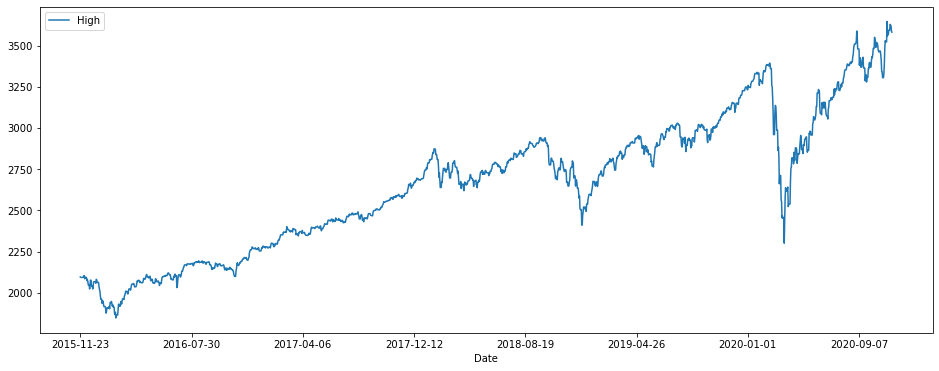

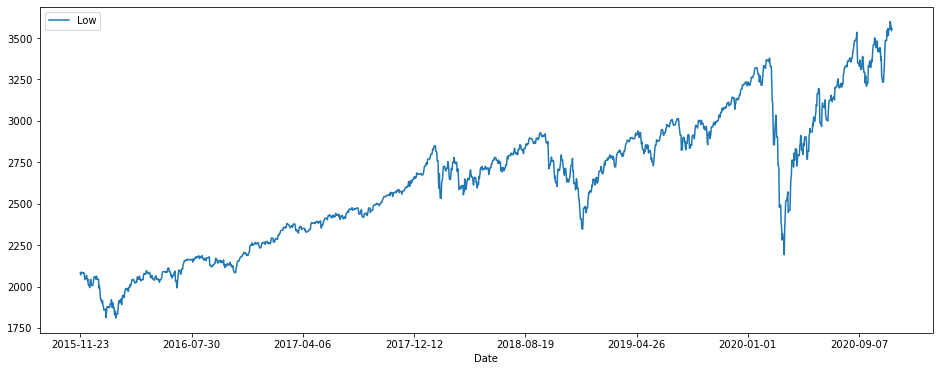

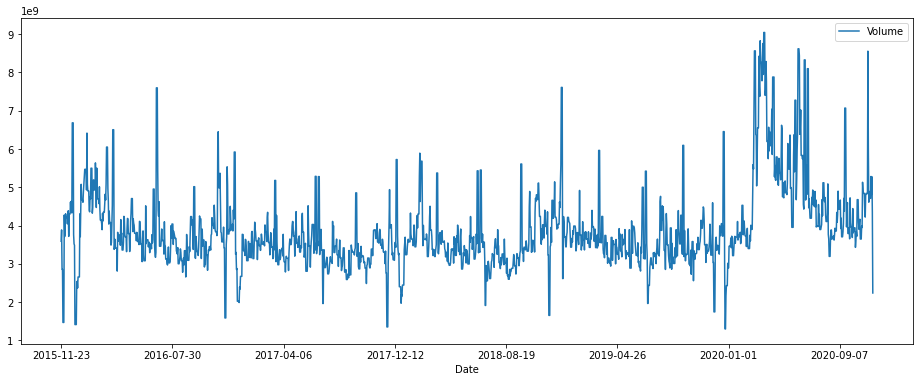

In [32]:
#plot the data
df.plot(x='Date', y='High', figsize=(16,6))
df.plot(x='Date', y='Low', figsize=(16,6))
df.plot(x='Date', y='Volume', figsize=(16,6))

In [34]:
#make LSTM model
class LSTM(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.hidden_size = 50
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1)
        self.linear = nn.Linear(in_features=50, out_features=1)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_size),
                            torch.zeros(1,1,self.hidden_size))

    def forward(self, input_seq):
        #forward pass for lstm model
        print(input_seq)
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

#make the dataset
class StockDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.data = self.data.drop(['Date'], axis=1)
        self.data = self.data.drop(['Open'], axis=1)
        self.data = self.data.drop(['Adj Close'], axis=1)
        self.data = self.data.drop(['Close'], axis=1)
        self.data = self.data.drop(['Volume'], axis=1)
        self.data = self.data
        self.len = self.data.shape[0]
        self.data = self.data.values

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.len

#make the dataloader
dataset = torch.Tensor(StockDataset(csv_file='data/yahoo_stock.csv'))
print(dataset.shape)
train_loader = DataLoader(dataset=dataset, batch_size=1, shuffle=False)

#make the model
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#train the model
epochs = 150
for i in range(epochs):
    for seq, labels in enumerate(train_loader):
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_size),
                            torch.zeros(1, 1, model.hidden_size))
        y_pred = model(seq)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()
    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')


torch.Size([1825, 2])
0


AttributeError: 'int' object has no attribute 'view'